# Metabolism at a glance - Exercises

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import numpy as np

Hint: Use page 76 and forward in Villadsen et al
An average biomass elemental composition of CH1.8O0.5N0.2 may be used

## Batch data analysis

A yeast strain was cultivated in batch culture under anaerobic conditions and samples were analyzed for the dry weight, glucose, ethanol and glycerol concentrations.

Let's read the file using pandas.

In [2]:
batch_data = pd.read_csv("data/batch-data-analysis-data.csv")
batch_data

,time [h],biomass [DW g/l],glucose [g/l],ethanol [g/l],glycerol [g/l]
0,0.00,0.0068,NaN,NaN,NaN
1,0.50,0.0100,20.02,0.00,0.01
2,2.42,0.0150,20.09,0.02,0.02
3,4.50,0.0190,20.00,0.03,0.02
4,6.34,0.0286,19.68,0.04,0.05
5,9.25,0.0608,19.47,0.17,0.15
6,11.34,0.1100,19.21,0.31,0.32
7,14.17,0.2300,18.12,0.68,0.36
8,17.17,0.4920,15.47,1.55,0.73
9,17.84,0.5560,14.34,1.96,0.82


### a)

Plot the data, find the region with the exponential growth and find $μ_{max}$

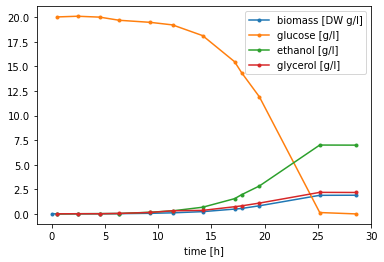

In [3]:
batch_data.plot(x='time [h]', style='.-');

### b) 

During exponential growth the yield coefficients should be constant. Prove it by plotting. Calculate the yield coefficients for biomass, ethanol and glycerol on glucose (Ysx, Yse, and Ysg) in g/g and in Cmol/Cmol.
Assume the generalized composition of the biomass: $CH_{1.8}O_{0.5}N_{0.2}$.

Method:
- Show exponential phase (semilog plot)
- linear regressions substrate and products (only using exponential phase)
- transform yields in g/g to cmol/cmol through molarmasses

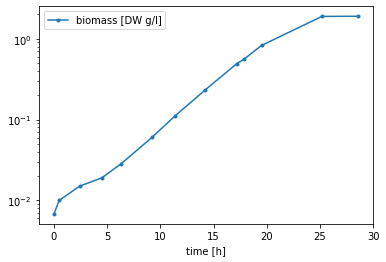

In [11]:
# identify exponential growth
batch_data.plot(x='time [h]', y='biomass [DW g/l]', style='.-');
plt.yscale('log')

In [12]:
batch_data['time [h]']

0      0.00
1      0.50
2      2.42
3      4.50
4      6.34
5      9.25
6     11.34
7     14.17
8     17.17
9     17.84
10    19.50
11    25.17
12    28.59
Name: time [h], dtype: float64

I found between 5 and 20 to be in linear part, times stamps are equivalent to index 4 to 10.

In [26]:
from scipy.optimize import curve_fit
exp_phase_time = batch_data.loc[4:10, 'time [h]']
exp_phase_biomass = batch_data.loc[4:10, 'biomass [DW g/l]']
exp_func = lambda t, a, mu_max: a * np.exp(t*mu_max)

popt , pcov = biomass_fit = curve_fit(exp_func, xdata=exp_phase_time, ydata=exp_phase_biomass) # return parameters optimised (popt) and parameter covariance matrix (pcov)


mu_max_hat: 0.24078499394651293


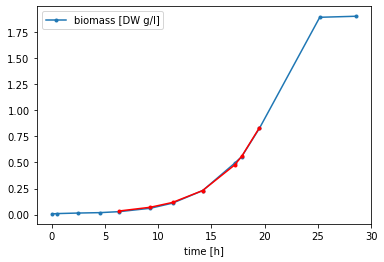

In [35]:
batch_data.plot(x='time [h]', y='biomass [DW g/l]', style='.-')
plt.plot(exp_phase_time, exp_func(exp_phase_time, *popt), 'r.-');
print('mu_max_hat: ' + str(popt[1]))


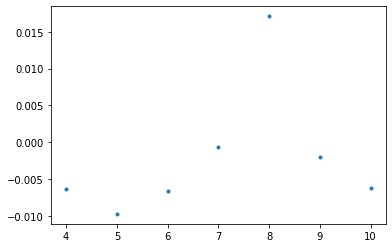

In [39]:
# checking residuals
residuals = exp_phase_biomass - exp_func(exp_phase_time, *popt)
residuals.plot(style='.');

Residuals does still seem to contain some trends. e.g. notice that all but one are negative. Though more testing would be required to propably asses if anything is wrong.

<AxesSubplot:xlabel='glucose [g/l]'>

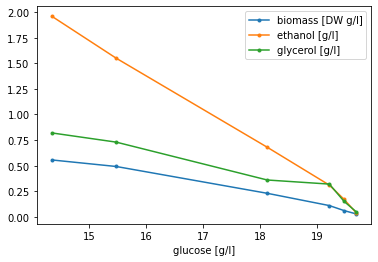

In [50]:
batch_data.iloc[4:10, 1:].plot(x='glucose [g/l]', style='.-')

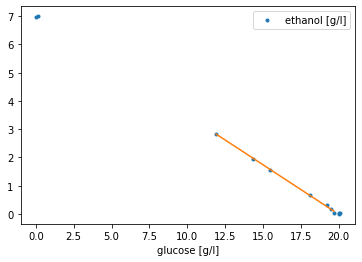

In [47]:
from scipy.stats import linregress


slope, intercept, r, p, se = linregress(batch_data.loc[4:10, 'glucose [g/l]'], batch_data.loc[4:10, 1:])
y_pred = slope * batch_data.loc[4:10, 'glucose [g/l]'] + intercept

batch_data.plot(x='glucose [g/l]', y='ethanol [g/l]', style='.')
plt.plot(batch_data.loc[4:10, 'glucose [g/l]'], y_pred)

### c)

Make a C balance and calculate the yield of CO2 on glucose ($Y_{sc}$).

1 - Yse - Ysx - Ysgly = Ysco2 (all in cmol/cmol)

### d)

Using the calculated μmax and yield coefficients, calculate the specific consumption rate for glucose ($r_s$) and specific production rates for ethanol, glycerol and CO2 ($r_e$, $r_g$, and $r_c$). Use units of C-mmol/g DW·h.

$r_s = Y_{sx}^{-1} * \mu_{max} * cmM_{glu}$

where $cmM_{glu}$ is the milimolar mass of glucose in c-mol